# MiniProject 1: Machine Learning 101




### Load the dataset.

In [2]:
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt 
#from matplotlib.colors import ListedColormap
#plt.style.use('seaborn')

features = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']
classification_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

def find_category(string, index):
    categories = {'workclass': ['Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked'],
                  'education': ['Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool'],
                  'marital-status': ['Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse'],
                  'occupation': ['Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing','Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'],
                  'relationship': ['Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'],
                  'race': ['White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'],
                  'sex': ['Female', 'Male'],
                  'native-country': ['United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands']}
    l = categories[features[index]]
    if string in l:
        return l.index(string)
    return -1

converters = {}
converters[1] = lambda s: find_category(s.strip(), 1)
converters[3] = lambda s: find_category(s.strip(), 3)
converters[5] = lambda s: find_category(s.strip(), 5)
converters[6] = lambda s: find_category(s.strip(), 6)
converters[7] = lambda s: find_category(s.strip(), 7)
converters[8] = lambda s: find_category(s.strip(), 8)
converters[9] = lambda s: find_category(s.strip(), 9)
converters[13] = lambda s: find_category(s.strip(), 13)
converters[len(features)] = lambda s: 1 if s == '>50K' else 0

data = np.loadtxt('./adult.data', dtype=int,  encoding='utf-8-sig', delimiter=', ', converters=converters)
print(data.shape)
y_train = data[:, -1]
X_train = np.delete(data, -1, axis=1)

(32561, 15)


### Visualize the distribution of data.

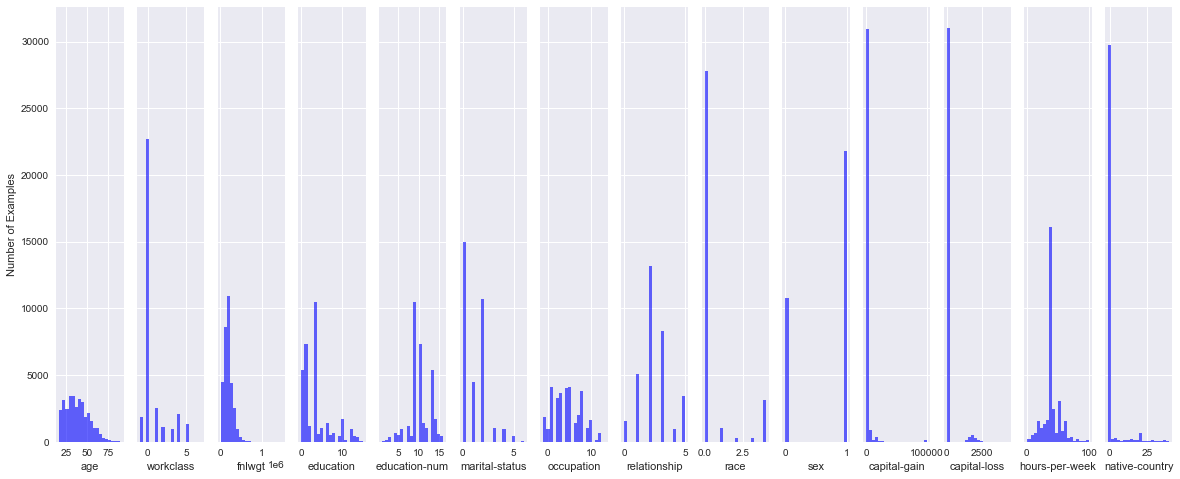

In [118]:
def plot_features(X):
  fig, axs = plt.subplots(1, X_train.shape[1], sharey=True)
  fig.set_size_inches(20, 8)

  for i, ax in enumerate(axs):
    ax.hist(X_train[:, i], 20, facecolor='b', alpha=0.6)
    ax.set_xlabel(f'{features[i]}')
  axs[0].set_ylabel('Number of Examples')
  plt.show()

plot_features(X_train)

### Visualize the data.

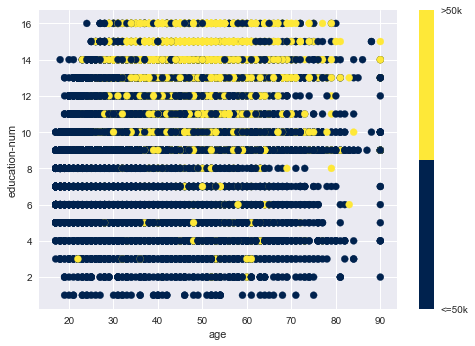

In [119]:
def draw(x1_index, x2_index):
    formatter = plt.FuncFormatter(lambda i, *args: '>50k' if i==1 else '<=50k')
    plt.scatter(X_train[:,x1_index], X_train[:,x2_index], c=y_train, cmap=plt.cm.get_cmap('cividis',2))
    plt.colorbar(ticks=[0,1], format=formatter)
    plt.xlabel(features[x1_index])
    plt.ylabel(features[x2_index])

#
draw(0,4)

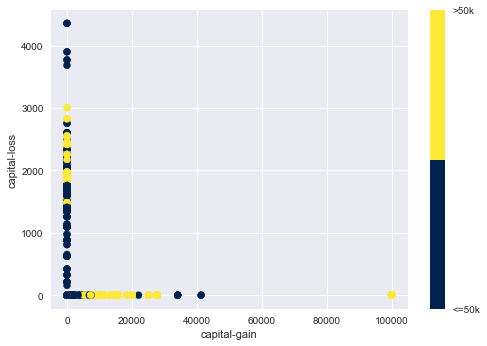

In [120]:
draw(10,11)

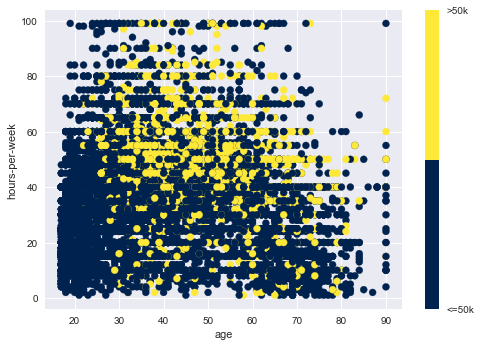

In [121]:
draw(0, 12)

In [123]:
from sklearn import neighbors
n_neighbors = 5
knn_model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_train)
acc = np.mean(y_pred == y_train)

print(f'{acc:.4f}')

0.8367


### Use 5-fold cross-validation to pick the best K value of KNN model

In [12]:
from sklearn import neighbors
from sklearn.model_selection import cross_val_score

best_acc = 0
accuracy = np.zeros(50)

for n_neighbors in np.arange(1,50):
    knn_model = neighbors.KNeighborsClassifier(n_neighbors=n_neighbors)
    acc = cross_val_score(knn_model, data, y_train, cv=5).mean()
    accuracy[n_neighbors] = acc
    if n_neighbors%5==0: print(n_neighbors * 2,'%')
    if acc > best_acc:
        best_cfg = n_neighbors
        best_acc = acc
        best_model = knn_model

print(best_acc, best_cfg)

10 %
20 %
30 %
40 %
50 %
60 %
70 %
80 %
90 %
0.7987469966511882 31


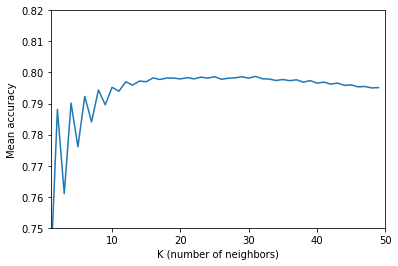

In [13]:
plt.plot(accuracy)
plt.xlim(1,50)
plt.ylim(0.75,0.82)
plt.ylabel('Mean accuracy')
plt.xlabel('K (number of neighbors)')
plt.show()

In [16]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)

print('finished')

finished


[0, 4]
[0, 12]


(16.0, 90.9799999999984, 0.0, 99.98)

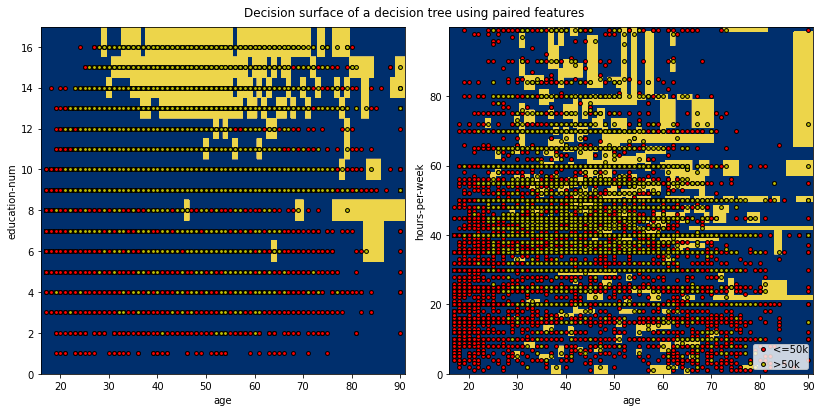

In [38]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

plot_colors = "ry"
plot_step = 0.02
plt.figure(figsize=(12,6))
for pairidx, pair in enumerate([[0, 4], [0, 12]]):
    print(pair)
    X = X_train[:, pair]
    clf = DecisionTreeClassifier().fit(X, y_train)

    # Plot the decision boundary
    plt.subplot(1, 2, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=2, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.cividis)

    plt.xlabel(features[pair[0]])
    plt.ylabel(features[pair[1]])

    # Plot the training points
    labels = ['<=50k', '>50k']
    for i, color in zip(range(2), plot_colors):
        idx = np.where(y_train == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=labels[i], cmap=plt.cm.cividis, edgecolor='black', s=15)

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc='lower right', borderpad=0, handletextpad=0)
plt.axis("tight")

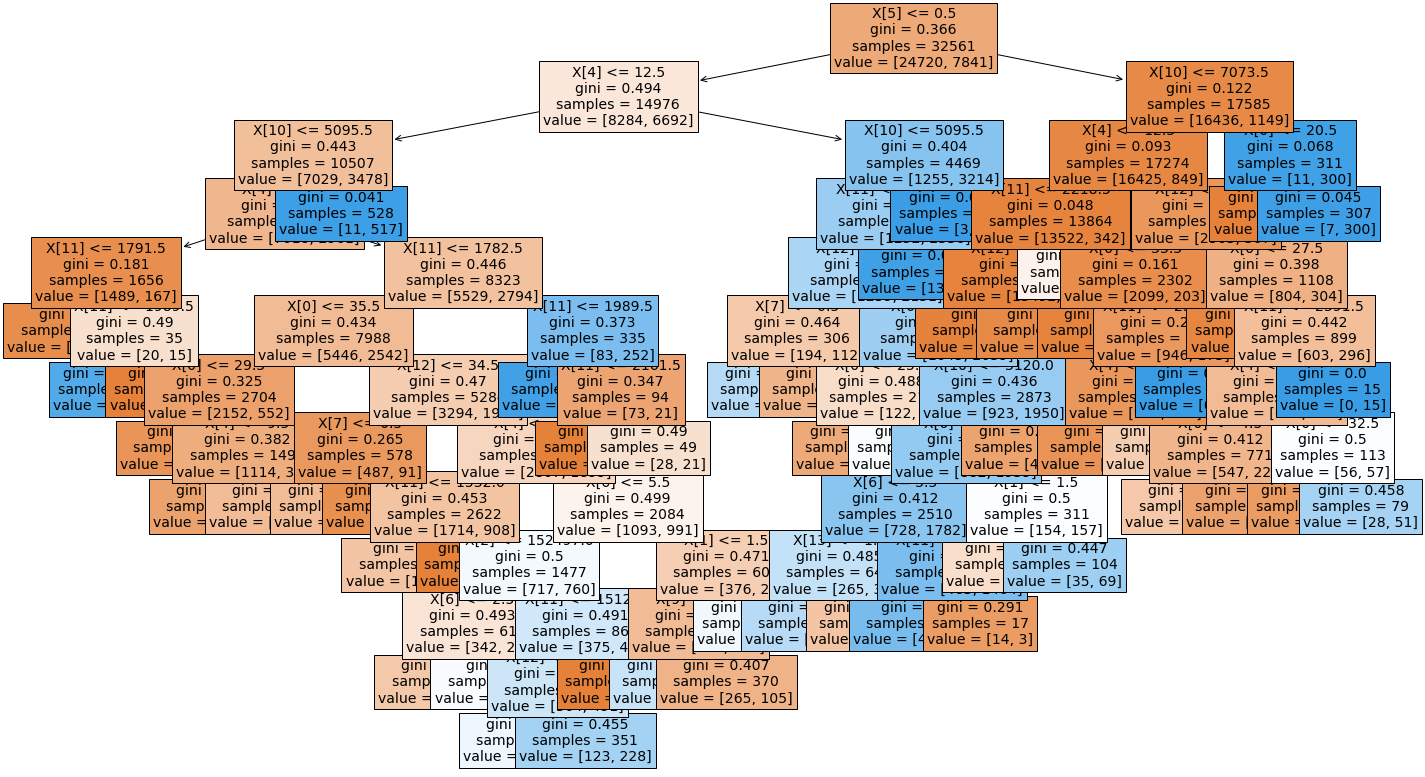

In [30]:
plt.figure(figsize=(24,14))
clf = DecisionTreeClassifier(max_depth=20, min_impurity_decrease=0.0001, max_leaf_nodes=50)
clf.fit(X_train, y_train)
plot_tree(clf, filled=True, fontsize=14)
plt.show()